# Visaulize Twitch Gaming Data 
In this project, we will visualize Twitch data using Python and Matplotlib, in the forms of:

- **Bar Graph:** Featured Games
- **Pie Chart:** Stream Viewers’ Locations
- **Line Graph:** Time Series Analysis

## Import Modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
import sqlalchemy
%load_ext sql

## Connect Sqlite Database

In [3]:
%%sql 
sqlite:///twitch_sqlite.db

In [6]:
%%sql
SELECT name AS table_names
FROM sqlite_master
WHERE type="table"

 * sqlite:///twitch_sqlite.db
Done.


table_names
chat
stream


## Bar Graph: Featured Games
If we queried the Twitch practice dataset using SQL, we would get back the following list of the top 10 trending games (on January 1st, 2015) and their number of viewers:

In [22]:
top_10_games =  %sql SELECT game, COUNT(DISTINCT device_id) count_of_user\
                     FROM stream\
                     GROUP BY game\
                     ORDER BY 2 DESC\
                     LIMIT 10

 * sqlite:///twitch_sqlite.db
Done.


In [34]:
top_10_games = top_10_games.DataFrame()

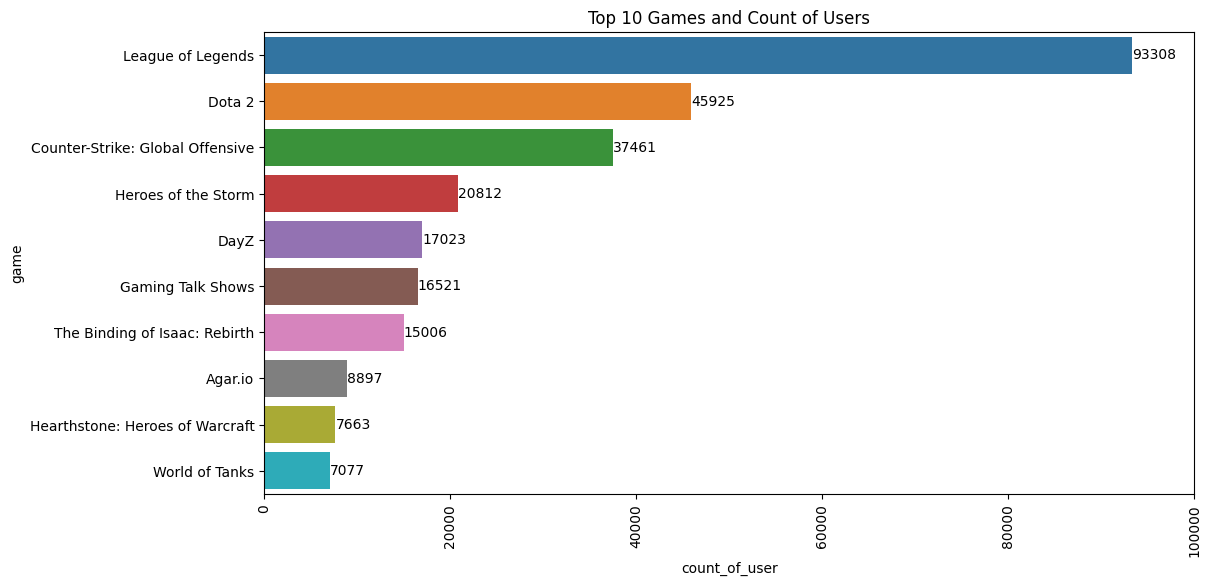

In [57]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data = top_10_games, y= "game", x = "count_of_user")
plt.xticks(rotation = 90)
for i in ax.containers:
    ax.bar_label(i)
plt.title("Top 10 Games and Count of Users")
plt.xlim([0, 100000])
plt.show()

## Pie Chart: League of Legends Viewers
Find the 10 countries where the league of legends game has the most users.

If we queried the Twitch practice dataset using SQL, our results would return the following:

In [74]:
lol_top10_country = %sql SELECT country, COUNT(DISTINCT device_id) count_of_user\
                         FROM stream\
                         WHERE game = 'League of Legends'\
                         GROUP BY country\
                         ORDER BY 2 DESC\
                         LIMIT 10

 * sqlite:///twitch_sqlite.db
Done.


In [76]:
lol_top10_country = lol_top10_country.DataFrame()

In [109]:
lol_top10_country.fillna("Other", inplace=True)

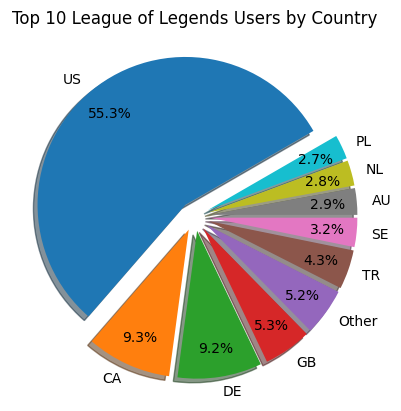

In [130]:
plt.pie(data= lol_top10_country, x ="count_of_user", labels="country", 
        shadow=True, autopct="%.1f%%", pctdistance=0.8, 
        explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
        startangle=30)
plt.title("Top 10 League of Legends Users by Country")
plt.axis()
plt.show()

## Line Graph: Time Series Analysis

We were able to find the number of US viewers at different hours of the day on January 1st, 2015:

In [173]:
us_users_byhour =  %sql SELECT strftime('%H', time) hour_, COUNT(DISTINCT device_id) count_of_user\
                        FROM stream\
                        WHERE country = 'US'\
                        GROUP BY 1\
                        ORDER BY 1 ASC;

us_users_byhour = us_users_byhour.DataFrame()

 * sqlite:///twitch_sqlite.db
Done.


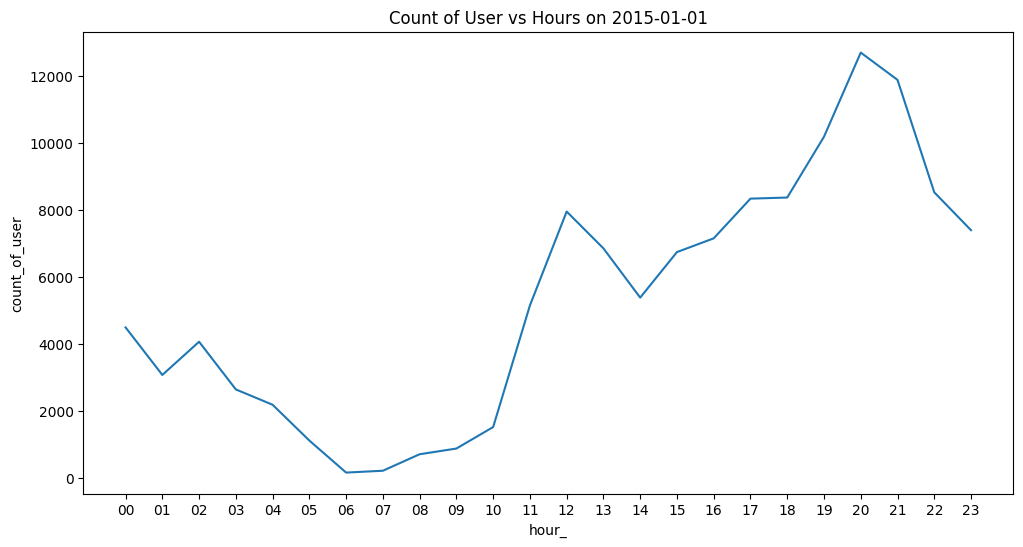

In [194]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=us_users_byhour, x = "hour_", y = "count_of_user")
plt.title("Count of User vs Hours on 2015-01-01")

plt.show()